# Assignment 5
## Step 1
## Step 2
## Step 3

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('default of credit card clients.xls',skiprows=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Split the DataFrame into training and testing sets
train, test = train_test_split(df, test_size=0.5)

# Print the size of the training and testing sets
print('Training set size:', len(train))
print('Testing set size:', len(test))

Training set size: 15000
Testing set size: 15000


In [5]:
female_train = train[train['SEX'] == 2]
female_train_count = len(female_train)
print("Number of Female Members in Training Set ", female_train_count)

Number of Female Members in Training Set  9115


In [6]:
male_train = train[train['SEX'] == 1]
male_train_count = len(male_train)
print("Number of Male Members in Training Set ", male_train_count)

Number of Male Members in Training Set  5885


In [7]:
female_test = test[test['SEX'] == 2]
female_test_count = len(female_test)
print("Number of Female Members in Testing Set ", female_test_count)

Number of Female Members in Testing Set  8997


In [8]:
male_test = test[test['SEX'] == 1]
male_test_count = len(male_test)
print("Number of Male Members in Testing Set ", male_test_count)

Number of Male Members in Testing Set  6003


## Step 4

Calculate and add the Creditworthiness column using -((X6+X7+X8+X9+X10+X11))/6 to the existing dataset.

In [9]:
train['raw_creditworthiness'] = -(train['PAY_0']
                              +train['PAY_2']
                              +train['PAY_3']
                              +train['PAY_4']
                              +train['PAY_5']
                              +train['PAY_6'])/6

In [10]:
min_creditworthiness = min(train['raw_creditworthiness'])
print("min raw_creditworthiness: ", min_creditworthiness)
max_creditworthiness = max(train['raw_creditworthiness'])
print("max raw_creditworthiness: ", max_creditworthiness)
creditworthiness_range = max_creditworthiness - min_creditworthiness
print("raw_creditworthiness_range", creditworthiness_range)
train['raw_creditworthiness'].head()

min raw_creditworthiness:  -5.5
max raw_creditworthiness:  2.0
raw_creditworthiness_range 7.5


9297     0.000000
29664    1.333333
16000   -4.666667
19983    2.000000
6504     1.000000
Name: raw_creditworthiness, dtype: float64

In [11]:
# scale the creditworthiness to 0 - 100
train['creditworthiness'] = np.round(
                            (train['raw_creditworthiness'] - min_creditworthiness)
                            /creditworthiness_range*100)

In [12]:
train['creditworthiness']

9297      73.0
29664     91.0
16000     11.0
19983    100.0
6504      87.0
         ...  
5451      58.0
18307     73.0
18915     82.0
20635     76.0
13274     73.0
Name: creditworthiness, Length: 15000, dtype: float64

### graph the data to hist

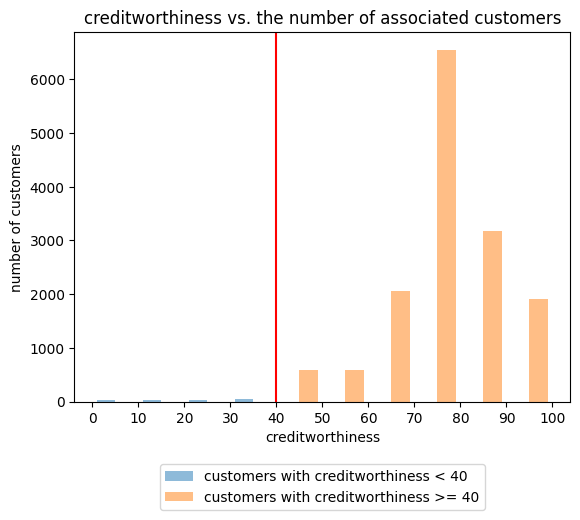

In [13]:
# Create a sample dataset of values
data = train['creditworthiness']
threadhold = 40

# Group the data based on a certain condition
condition1 = data < threadhold
condition2 = data >= threadhold

group1 = data[condition1]
group2 = data[condition2]

# Create the histogram with grouped bars
fig, ax = plt.subplots()
# Plot the histogram with grouped bars
n, bins, patches = ax.hist([group1, group2], bins=10, alpha=0.5, label=['customers with creditworthiness < 40', 'customers with creditworthiness >= 40'])
# Draw a vertical line at x=1
ax.axvline(x=threadhold, color='red')

# Set xticks to label every 2 units
xticks = np.arange(0, 110, 10)
ax.set_xticks(xticks)

# Set the x-axis label
plt.xlabel('creditworthiness')
# Set the y-axis label
plt.ylabel('number of customers')
# Set the title
plt.title('creditworthiness vs. the number of associated customers')

# Add legends to the plot and place below and out of the histogram
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

# Show the plot
plt.show()

Favorable (i.e. Approved) versus Unfavorable (i.e. Declined) outcomes. 
A Favorable outcome is associated with an Approved Loan. An Unfavorable outcome is associated with a Declined Loan.

In [14]:
female_train_favorable = train[(train['default payment next month'] == 1) & (train['SEX'] == 2)]
female_train_unfavorable = train[(train['default payment next month'] == 0) & (train['SEX'] == 2)]
female_train_favorable_count = len(female_train_favorable)
female_train_unfavorable_count = len(female_train_unfavorable)
print("Number of Female Members in Training Set - favorable", female_train_favorable_count)
print("Number of Female Members in Training Set - unfavorable", female_train_unfavorable_count)


Number of Female Members in Training Set - favorable 1864
Number of Female Members in Training Set - unfavorable 7251


In [15]:
male_train_favorable = train[(train['default payment next month'] == 1) & (train['SEX'] == 1)]
male_train_unfavorable = train[(train['default payment next month'] == 0) & (train['SEX'] == 1)]
male_train_favorable_count = len(male_train_favorable)
male_train_unfavorable_count = len(male_train_unfavorable)
print("Number of Male Members in Training Set - favorable", male_train_favorable_count)
print("Number of Male Members in Training Set - unfavorable", male_train_unfavorable_count)

Number of Male Members in Training Set - favorable 1435
Number of Male Members in Training Set - unfavorable 4450


## Step 5
Calculate Profits:

In [16]:
Approved_Good_Credit = train[(train['default payment next month'] == 1) & (train['creditworthiness'] >= threadhold)]
Approved_Good_Credit_count = len(Approved_Good_Credit)
print("Approved Loan/Good Credit Risk: ", Approved_Good_Credit_count)

Approved Loan/Good Credit Risk:  3208


In [17]:
Approved_Bad_Credit = train[(train['default payment next month'] == 1) & (train['creditworthiness'] < threadhold)]
Approved_Bad_Credit_count = len(Approved_Bad_Credit)
print("Approved Loan/Bad Credit Risk: ", Approved_Bad_Credit_count)

Approved Loan/Bad Credit Risk:  91


In [18]:
Declined_Good_Credit = train[(train['default payment next month'] == 0) & (train['creditworthiness'] >= threadhold)]
Declined_Good_Credit_count = len(Declined_Good_Credit)
print("Declined Loan/Good Credit Risk: ", Declined_Good_Credit_count)

Declined Loan/Good Credit Risk:  11669


In [19]:
Declined_Bad_Credit = train[(train['default payment next month'] == 0) & (train['creditworthiness'] < threadhold)]
Declined_Bad_Credit_count = len(Declined_Bad_Credit)
print("Declined Loan/Bad Credit Risk: ", Declined_Bad_Credit_count)

Declined Loan/Bad Credit Risk:  32


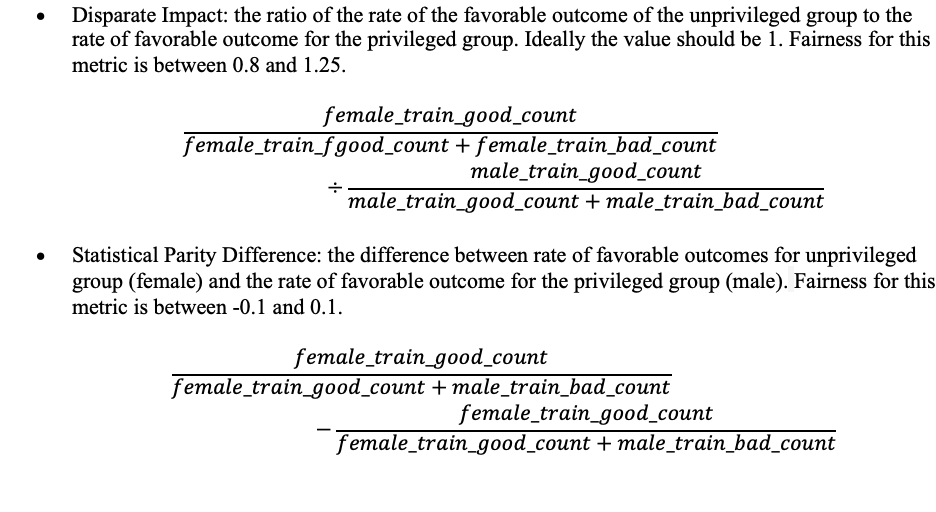

In [20]:
female_train_good_count = len(train[(train['SEX'] == 2) & (train['creditworthiness'] >= threadhold)])
female_train_bad_count = len(train[(train['SEX'] == 2) & (train['creditworthiness'] < threadhold)])
male_train_good_count = len(train[(train['SEX'] == 1) & (train['creditworthiness'] >= threadhold)])
male_train_bad_count = len(train[(train['SEX'] == 1) & (train['creditworthiness'] < threadhold)])

In [21]:
di = (female_train_good_count/(female_train_good_count + female_train_bad_count))/(male_train_favorable_count/(male_train_good_count+male_train_bad_count))
print("Disparate Impact:", di)

spd = (female_train_good_count/(female_train_good_count + female_train_bad_count))-(male_train_favorable_count/(male_train_good_count+male_train_bad_count))
print("Statistical Parity Difference:", spd)

Disparate Impact: 4.074949780294762
Statistical Parity Difference: 0.7497965904372106


<BarContainer object of 1 artists>

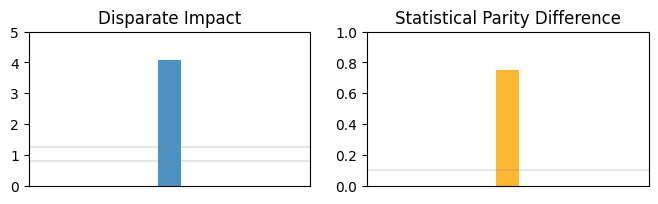

In [22]:
figure, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,2))

#Disparate Impact
ax0.set_title("Disparate Impact")
ax0.set_ylim(0, 5)
ax0.set_xlim(-5, 5)
ax0.xaxis.set_visible(False)

ax0.axhline(y=0.8, color='grey', alpha=0.2)
ax0.axhline(y=1.25, color='grey', alpha=0.2)
# ax0.text(0.8, 1.25, 'Fair', fontsize = 20, color='r')
ax0.bar(0, di, alpha=0.8)

#Statistical Parity Difference
ax1.set_title("Statistical Parity Difference")
ax1.set_ylim(0, 1)
ax1.set_xlim(-5, 5)
ax1.xaxis.set_visible(False)

ax1.axhline(y=-0.1, color='grey', alpha=0.2)
ax1.axhline(y=0.1, color='grey', alpha=0.2)
ax1.bar(0, spd,color='orange', alpha=0.8)


## Step 6

In [23]:
mask = (train['SEX'] == 2)
train.loc[mask, 'raw_creditworthiness'] = train['raw_creditworthiness']*0.25

In [24]:
minf_creditworthiness = min(train['raw_creditworthiness'])
print("min raw_creditworthiness: ", min_creditworthiness)
max_creditworthiness = max(train['raw_creditworthiness'])
print("max raw_creditworthiness: ", max_creditworthiness)
creditworthiness_range = max_creditworthiness - min_creditworthiness
print("raw_creditworthiness_range", creditworthiness_range)

min raw_creditworthiness:  -5.5
max raw_creditworthiness:  2.0
raw_creditworthiness_range 7.5


In [25]:
# scale the creditworthiness to 0 - 100
train['creditworthiness'] = np.round(
                            (train['raw_creditworthiness'] - min_creditworthiness)
                            /creditworthiness_range*100)

In [56]:
train['creditworthiness'].head()

9297     73.0
29664    91.0
16000    58.0
19983    80.0
6504     87.0
Name: creditworthiness, dtype: float64

In [26]:
mitigtated_dataf = train[train['SEX'] == 2]['creditworthiness']
mitigtated_datam = train[train['SEX'] == 1]['creditworthiness']

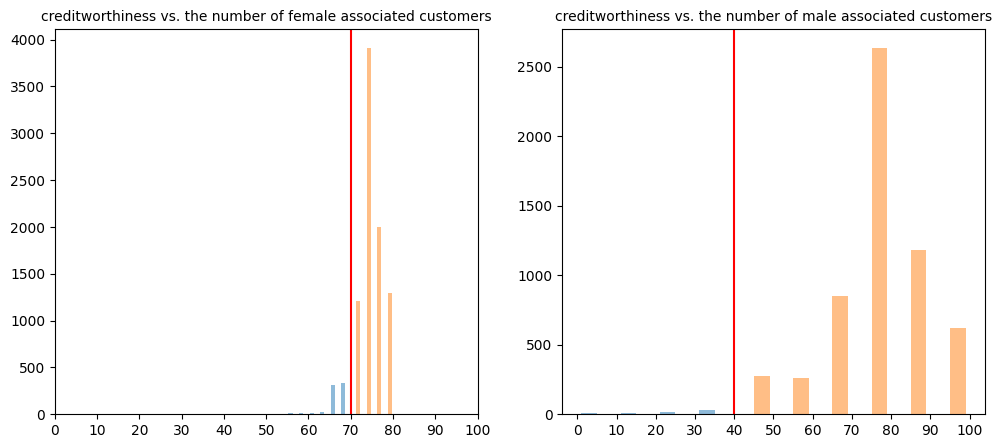

In [94]:
threadholdf = 70
threadholdm = 40
# Create the histogram with grouped bars
f, (axf, axm) = plt.subplots(1, 2, figsize=(12,5))

# Group the data based on a certain condition
conditionf1 = mitigtated_dataf < threadholdf
conditionf2 = mitigtated_dataf >= threadholdf

groupf1 = mitigtated_dataf[conditionf1]
groupf2 = mitigtated_dataf[conditionf2]

# Plot the histogram with grouped bars
axf.hist([groupf1, groupf2], bins=10, alpha=0.5, label=['female customers with creditworthiness < 40', 'female customers with creditworthiness >= 40'])
# Draw a vertical line at x=threadholdf
axf.axvline(x=threadholdf, color='red')

# Set xticks to label every 2 units
xticks = np.arange(0, 110, 10)
axf.set_xticks(xticks)


# Group the data based on a certain condition
conditionm1 = mitigtated_datam < threadholdm
conditionm2 = mitigtated_datam >= threadholdm

groupm1 = mitigtated_datam[conditionm1]
groupm2 = mitigtated_datam[conditionm2]

# Plot the histogram with grouped bars
axm.hist([groupm1, groupm2], bins=10, alpha=0.5, label=['male customers with creditworthiness < 30', 'male customers with creditworthiness >= 30'])
# Draw a vertical line at x=threadholdf
axm.axvline(x=threadholdm, color='red')

# Set xticks to label every 2 units
xticks = np.arange(0, 110, 10)
axf.set_xticks(xticks)
axm.set_xticks(xticks)

axf.set_title("creditworthiness vs. the number of female associated customers", fontsize=10)
axm.set_title("creditworthiness vs. the number of male associated customers", fontsize=10)

# Show the plot
plt.show()

In [95]:
mitigtated_female_train_good_fav_count = len(train[(train['SEX'] == 2) & (train['creditworthiness'] >= threadholdf) & (train['default payment next month'] == 1)])
mitigtated_female_train_good_unfav_count = len(train[(train['SEX'] == 2) & (train['creditworthiness'] >= threadholdf) & (train['default payment next month'] == 0)])
mitigtated_female_train_bad_fav_count = len(train[(train['SEX'] == 2) & (train['creditworthiness'] < threadholdf) & (train['default payment next month'] == 1)])
mitigtated_female_train_bad_unfav_count = len(train[(train['SEX'] == 2) & (train['creditworthiness'] < threadholdf) & (train['default payment next month'] == 0)])

In [96]:
print("mitigtated_female_train_good_fav_count", mitigtated_female_train_good_fav_count)
print("mitigtated_female_train_good_unfav_count", mitigtated_female_train_good_unfav_count)
print("mitigtated_female_train_bad_fav_count", mitigtated_female_train_bad_fav_count)
print("mitigtated_female_train_bad_unfav_count", mitigtated_female_train_bad_unfav_count)

mitigtated_female_train_good_fav_count 1412
mitigtated_female_train_good_unfav_count 6997
mitigtated_female_train_bad_fav_count 452
mitigtated_female_train_bad_unfav_count 254


In [97]:
mitigtated_male_train_good_fav_count = len(train[(train['SEX'] == 1) & (train['creditworthiness'] >= threadholdf) & (train['default payment next month'] == 1)])
mitigtated_male_train_good_unfav_count = len(train[(train['SEX'] == 1) & (train['creditworthiness'] >= threadholdf) & (train['default payment next month'] == 0)])
mitigtated_male_train_bad_fav_count = len(train[(train['SEX'] == 1) & (train['creditworthiness'] < threadholdf) & (train['default payment next month'] == 1)])
mitigtated_male_train_bad_unfav_count = len(train[(train['SEX'] == 1) & (train['creditworthiness'] < threadholdf) & (train['default payment next month'] == 0)])


In [98]:
print("mitigtated_male_train_good_fav_count", mitigtated_male_train_good_fav_count)
print("mitigtated_male_train_good_unfav_count", mitigtated_male_train_good_unfav_count)
print("mitigtated_male_train_bad_fav_count", mitigtated_male_train_bad_fav_count)
print("mitigtated_male_train_bad_unfav_count", mitigtated_male_train_bad_unfav_count)


mitigtated_male_train_good_fav_count 692
mitigtated_male_train_good_unfav_count 3746
mitigtated_male_train_bad_fav_count 743
mitigtated_male_train_bad_unfav_count 704


In [99]:
mdi = ((523+2766)/(523+2766+1341+4485))/((402+1900)/(402+1900+1033+2550))
print("mdi", mdi)

mdi 0.9224617101778462


In [100]:
mspd = ((523+2766)/(523+2766+1341+4485))-((402+1900)/(402+1900+1033+2550))
print("mspd", mspd)

mspd -0.030330185755411743


<BarContainer object of 1 artists>

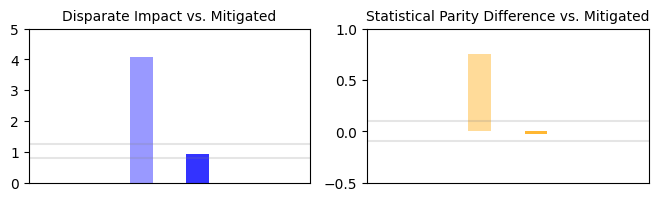

In [92]:
mf, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,2))

#Disparate Impact
ax0.set_title("Disparate Impact vs. Mitigated", fontsize=10)
ax0.set_ylim(0, 5)
ax0.set_xlim(-5, 5)
ax0.xaxis.set_visible(False)

ax0.axhline(y=0.8, color='grey', alpha=0.2)
ax0.axhline(y=1.25, color='grey', alpha=0.2)
ax0.bar(-1, di, color='blue', alpha=0.4)
ax0.bar(1, mdi, color='blue', alpha=0.8)

#Statistical Parity Difference
ax1.set_title("Statistical Parity Difference vs. Mitigated", fontsize=10)
ax1.set_ylim(-0.5, 1)
ax1.set_xlim(-5, 5)
ax1.xaxis.set_visible(False)

ax1.axhline(y=-0.1, color='grey', alpha=0.2)
ax1.axhline(y=0.1, color='grey', alpha=0.2)
ax1.bar(-1, spd, color='orange', alpha=0.4)
ax1.bar(1, mspd, color='orange', alpha=0.8)
